Saved Fig3a_FTIR_Offset as ('png', 'pdf')
Saved Fig3b_FTIR_Subpanels as ('png', 'pdf')


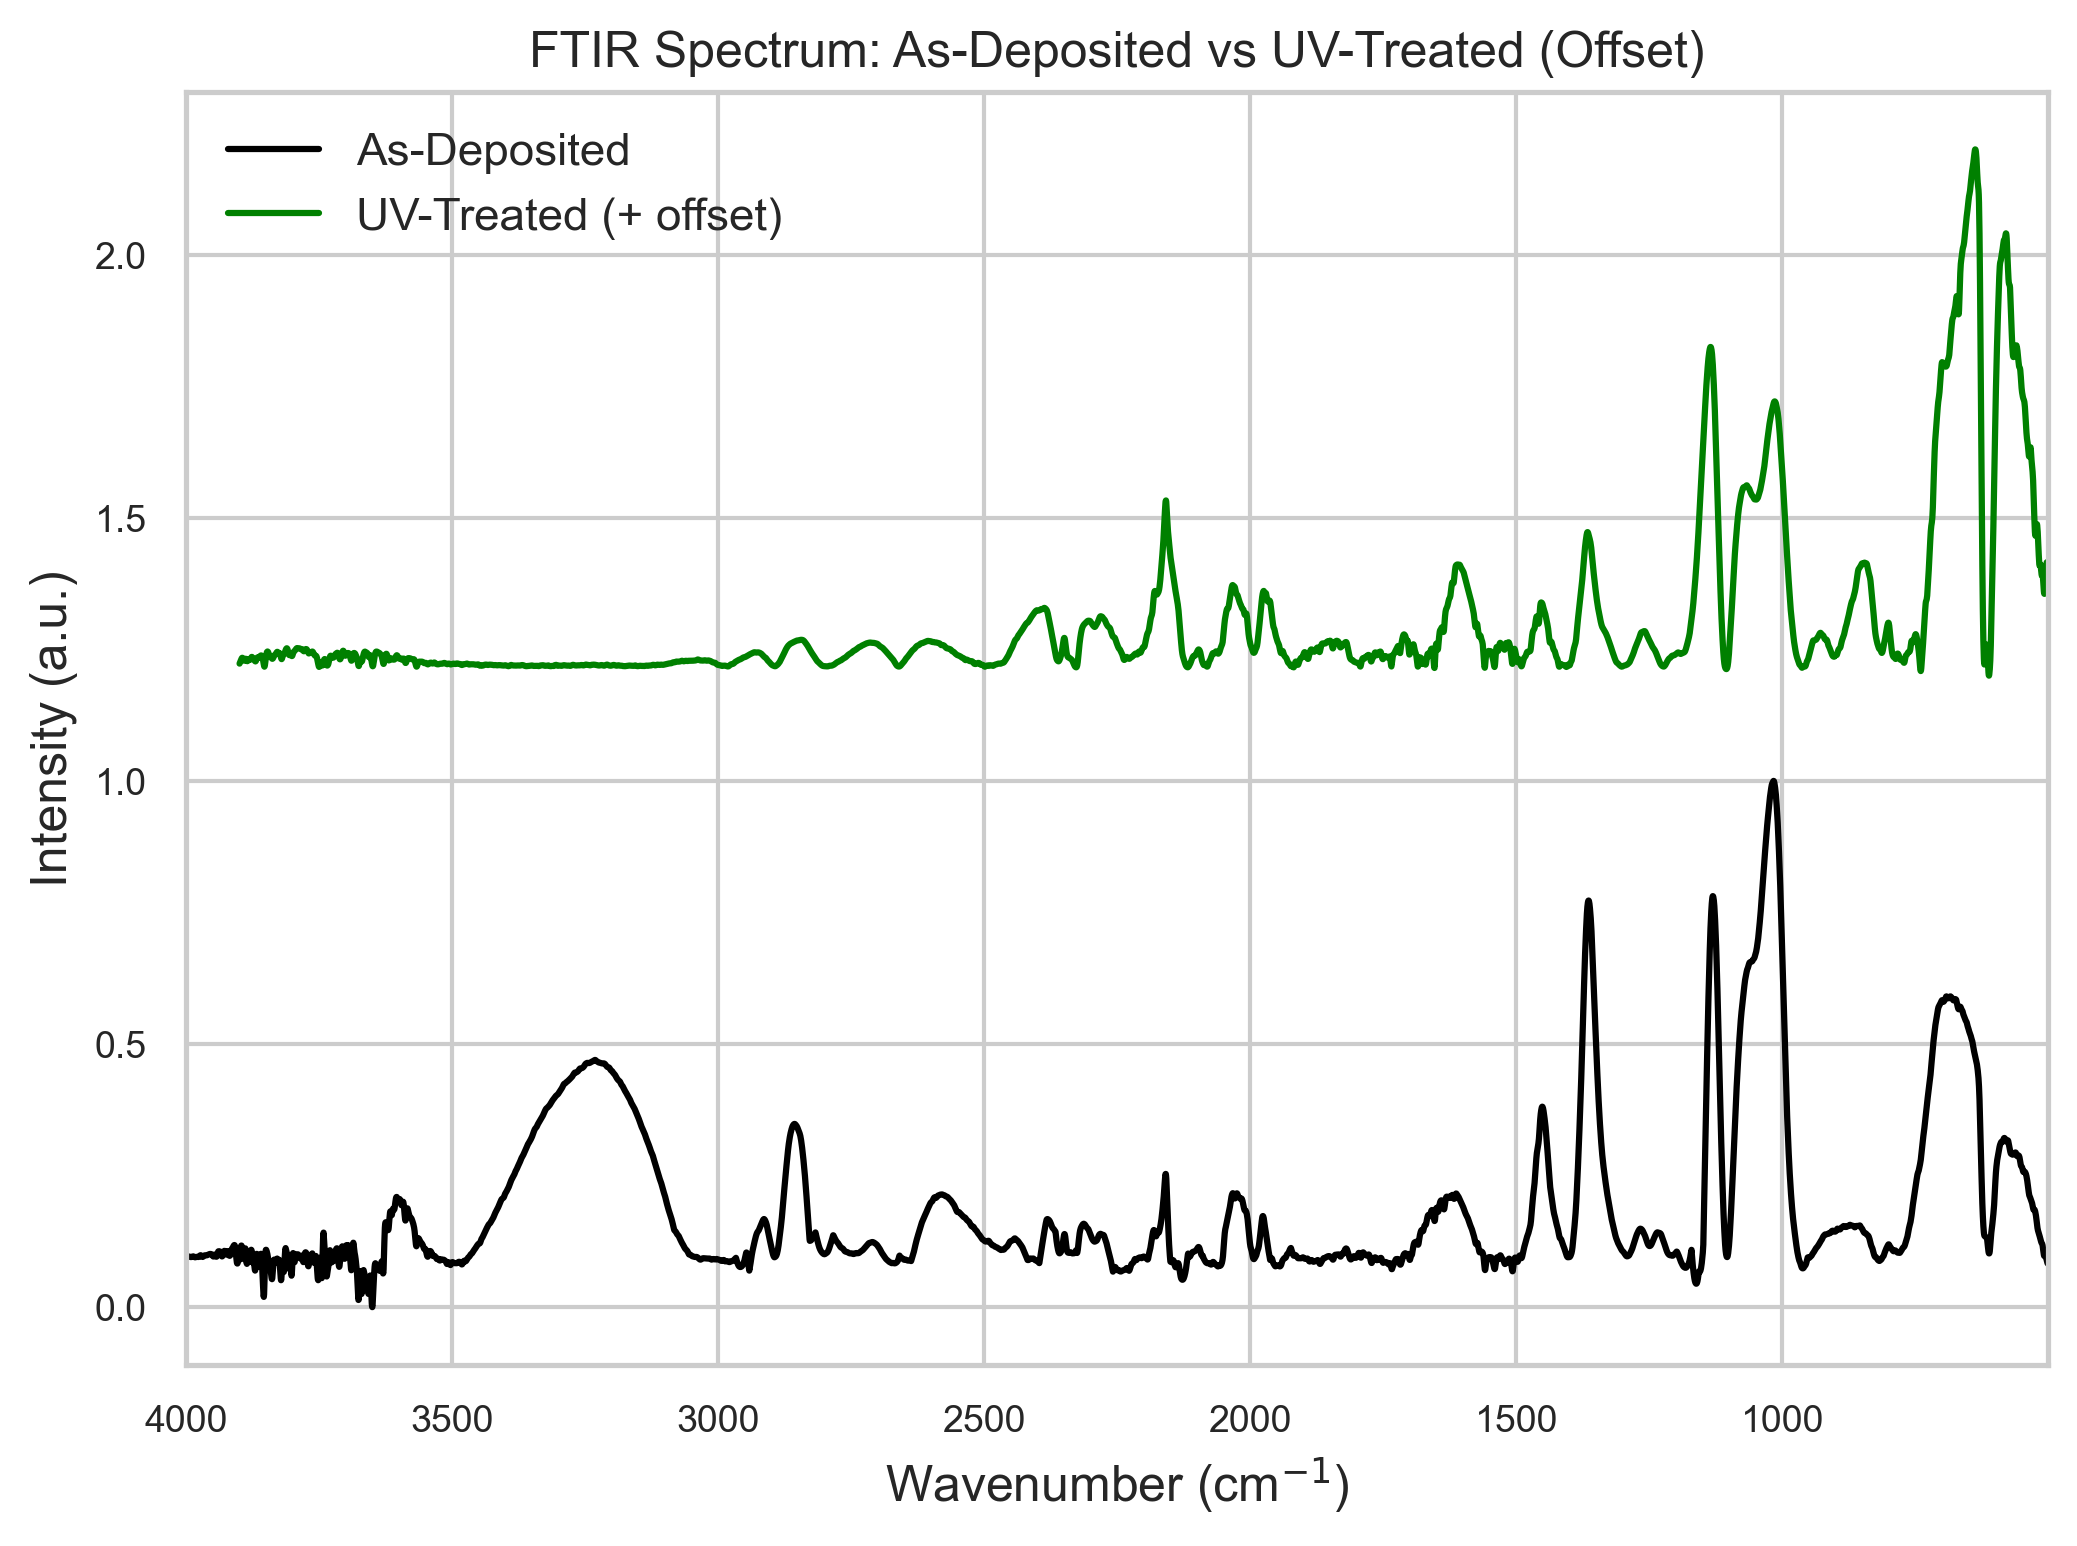

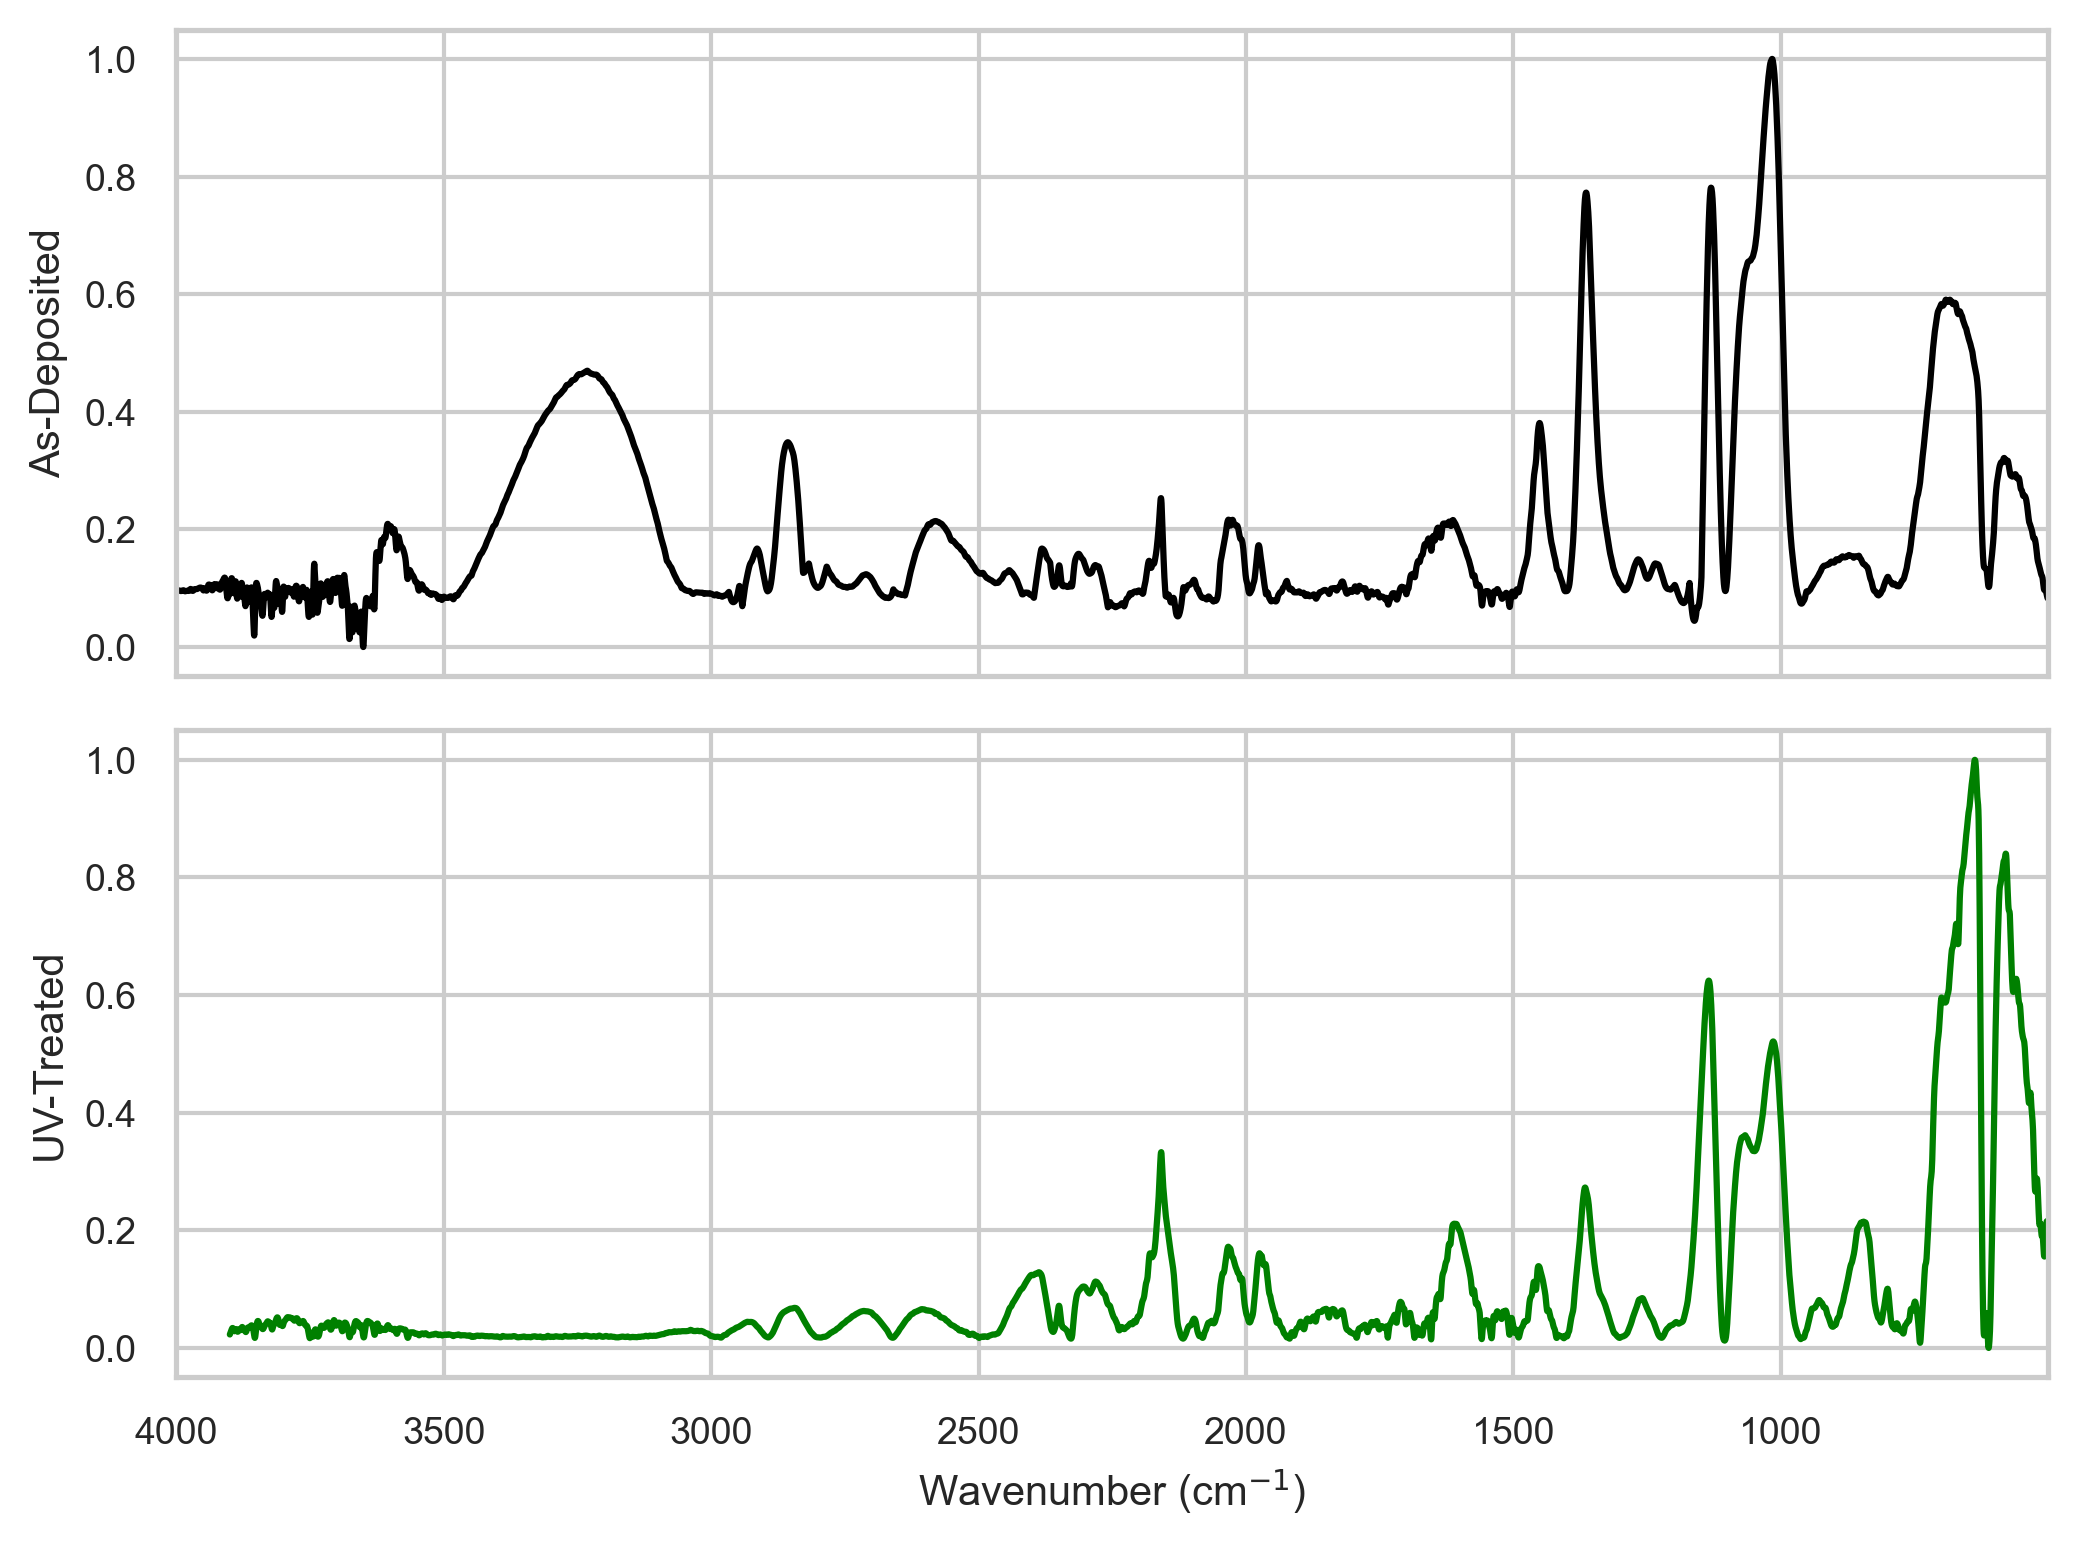

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from shared.utils.plot_styles import set_plot_style
from shared.utils.helpers import save_figure, get_figure_size
from shared.utils.config import fig_width_cm

# Set consistent plot style
set_plot_style()

# Load and clean FTIR data
ftir_df = pd.read_csv("../data/processed/BTYFTIR_Final.csv", skiprows=2)

ftir_df.columns = [
    "Wavenumber_AsDep", "Intensity_AsDep",
    "Wavenumber_UV", "Intensity_UV"
]

ftir_df = ftir_df.dropna().apply(pd.to_numeric, errors='coerce').dropna()

# Extract individual series
x_asdep = ftir_df["Wavenumber_AsDep"]
y_asdep = ftir_df["Intensity_AsDep"]
x_uv = ftir_df["Wavenumber_UV"]
y_uv = ftir_df["Intensity_UV"]

# Define figure size using consistent global config
figsize = get_figure_size(fig_width_cm, aspect_ratio=4/3)

# --- Plot 1: Overlaid offset spectra ---
fig1, ax1 = plt.subplots(figsize=figsize)
offset = 1.2

ax1.plot(x_asdep, y_asdep, label="As-Deposited", color='black')
ax1.plot(x_uv, y_uv + offset, label="UV-Treated (+ offset)", color='green')

ax1.set_xlabel("Wavenumber (cm$^{-1}$)")
ax1.set_ylabel("Intensity (a.u.)")
ax1.set_xlim(x_asdep.max(), x_asdep.min())  # Reverse x-axis
ax1.legend()
ax1.set_title("FTIR Spectrum: As-Deposited vs UV-Treated (Offset)")
ax1.tick_params(labelsize=9)

fig1.tight_layout()
save_figure(fig1, "Fig3a_FTIR_Offset", formats=("png", "pdf"))

# --- Plot 2: Two stacked subpanels ---
fig2, (ax2a, ax2b) = plt.subplots(2, 1, figsize=figsize, sharex=True)

ax2a.plot(x_asdep, y_asdep, color='black')
ax2a.set_ylabel("As-Deposited", fontsize=10)
ax2a.set_xlim(x_asdep.max(), x_asdep.min())
ax2a.tick_params(labelsize=9)

ax2b.plot(x_uv, y_uv, color='green')
ax2b.set_ylabel("UV-Treated", fontsize=10)
ax2b.set_xlabel("Wavenumber (cm$^{-1}$)", fontsize=10)
ax2b.tick_params(labelsize=9)

fig2.tight_layout()
save_figure(fig2, "Fig3b_FTIR_Subpanels", formats=("png", "pdf"))
plt.show()
